# K-Means Clustering

Estimated time needed: **25-30** minutes

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn's K-Means Clustering to cluster data


## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

*   Customer segmentation
*   Understand what the visitors of a website are trying to accomplish
*   Pattern recognition
*   Machine learning
*   Data compression

In this notebook we practice k-means clustering with 2 examples:

*   k-means on a random generated dataset
*   Using k-means for customer segmentation


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https://#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="https://#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="https://#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <p></p>
        <li><a href="https://#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="https://#pre_processing">Pre-processing</a></li>
                <li><a href="https://#modeling">Modeling</a></li>
                <li><a href="https://#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Import the Libraries

Let's first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [40]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy'])
# await piplite.install(['seaborn'])

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import numpy as np

print("All packages imported successfully!")

All packages imported successfully!


In [42]:
import random 
import numpy as np  
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
print("All packages imported successfully!")

All packages imported successfully!


In [43]:
%pip install pandas matplotlib scipy seaborn

Note: you may need to restart the kernel to use updated packages.


### Download the Data


In [44]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

In [45]:
# First install requests if needed
!pip install requests

import requests
import pandas as pd

def download_file(url, filename):
    """Download a file from URL to local filename"""
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f" Downloaded {filename} successfully!")
    else:
        print(f"Failed to download. Status code: {response.status_code}")

# Example usage:
# download_file('https://example.com/data.csv', 'data.csv')

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>

Let's create our own dataset for this lab!


First we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


In [46]:
np.random.seed(0) #sets the the random seed for reproductible results
# sets the seed value to NumPy's random number generator
# ensures that random operations will produce the same result each time the code is run

# makes random process deterministic and reproducible
print(np.random.rand(4))

[0.5488135  0.71518937 0.60276338 0.54488318]


Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br> <b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [47]:
## create the blobs with specified parameters
# n_sample=5000 (total number of points); 
# centers=[[4,4], [-2,-2],[2,-3],[1,1]] - (cluster cetres)
# cluster_std=0.9;  # standard deviation of clusters (controls spread)
# random_state=0 # ensures reproducible results

X, y = make_blobs(n_samples=5000, 
                  centers=[[4,4], [-2, -1], [2, -3], [1, 1]], 
                  cluster_std=0.9, random_state=0)

# return values:
#X: Feature matrix with shape (5000, 2) - the actual data points 
# (5000, 2) 5000: n_samples=500 (no, of data points)
# (5000, 2) ,2: dimensionality of the cluster centres (2D), 2 features

## the coded uses scikit-learn's make_blobs function to generate synthetic data for clustering algorithms
## cluster centter definition : 4 clusters with centers acoording to coorditanes above
## data generation process : for each of 5000 randomly assigns to one of the 4 clusters (roughly equal distribution)
## generates a point by samplin from normal distribution around cluster center
## spread controlled by cluster_std=0.9

Generated Data Shapes:
X shape: (5000, 2)
y shape: (5000,)

Sample Data Points:
First 10 samples of X:
 [[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 [-1.44019058 -1.36678252]
 [ 4.90119792  4.53749125]
 [ 2.54992151 -3.41705233]
 [ 1.90268222 -3.80481317]
 [ 2.53632101  1.32359471]
 [ 5.44766994  3.49457913]
 [ 1.29121859  1.12702441]]
First 10 samples of y:
 [1 2 2 1 0 2 2 3 0 3]


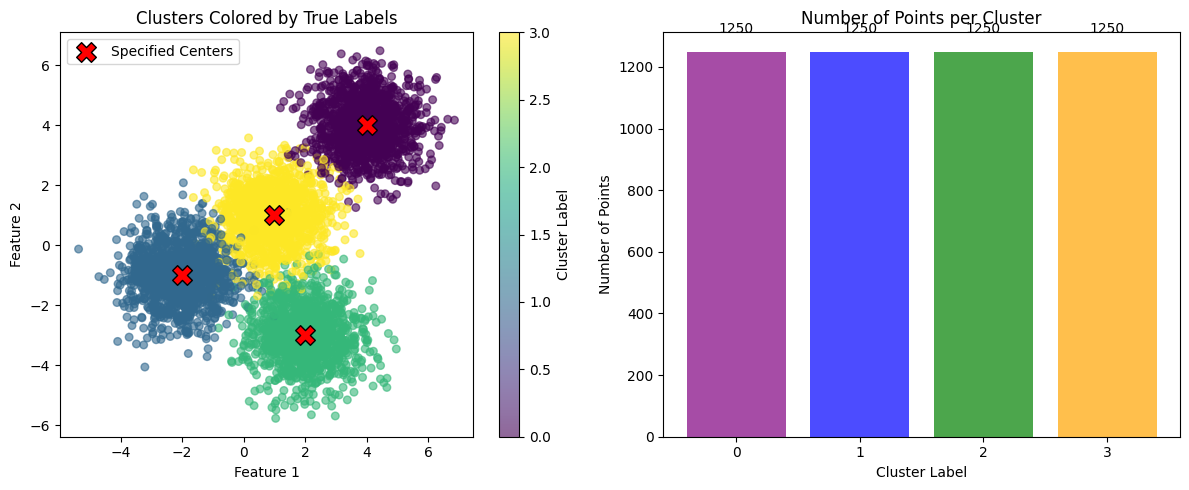

Cluster Information:
Number of clusters: 4
Cluster labels: [0 1 2 3]
Points per cluster: {np.int64(0): np.int64(1250), np.int64(1): np.int64(1250), np.int64(2): np.int64(1250), np.int64(3): np.int64(1250)}
Data Statistics:
Feature 1 - Mean: 1.23, Std: 2.34
Feature 2 - Mean: 0.24, Std: 2.73
Overall data range: [-5.76, 6.85]

 Specified Center Locations:
Cluster 0: (4, 4)
Cluster 1: (-2, -1)
Cluster 2: (2, -3)
Cluster 3: (1, 1)


In [48]:
# Print the shapes to verify:
print("Generated Data Shapes:")
print("X shape:", X.shape)  # Should be (5000, 2)
print("y shape:", y.shape)  # Should be (5000,)

# Display some sample data points
print("\nSample Data Points:")
print("First 10 samples of X:\n", X[:10])
print("First 10 samples of y:\n", y[:10])

# Visualize the clusters
plt.figure(figsize=(12, 5))

# Plot 1: Colored by cluster labels
plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, label='Cluster Label')
plt.title('Clusters Colored by True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the specified center points
centers = np.array([[4, 4], [-2, -1], [2, -3], [1, 1]])
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Specified Centers', edgecolors='black')
plt.legend()

# Plot 2: Show cluster distribution
plt.subplot(1, 2, 2)
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts, color=['purple', 'blue', 'green', 'orange'], alpha=0.7)
plt.title('Number of Points per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.xticks(unique)

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(unique[i], count + 50, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Additional information about the clusters
print("Cluster Information:")
print("Number of clusters:", len(np.unique(y)))
print("Cluster labels:", np.unique(y))
print ("Points per cluster:", dict(zip(unique, counts)))

# Calculate some statistics:
print("Data Statistics:")
print(f"Feature 1 - Mean: {X[:, 0].mean():.2f}, Std: {X[:, 0].std():.2f}")
print(f"Feature 2 - Mean: {X[:, 1].mean():.2f}, Std: {X[:, 1].std():.2f}")
print(f"Overall data range: [{X.min():.2f}, {X.max():.2f}]")

# Show the actual cluster centers from the generated data
print(f"\n Specified Center Locations:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: ({center[0]}, {center[1]})")

Display the scatter plot of the randomly generated data.


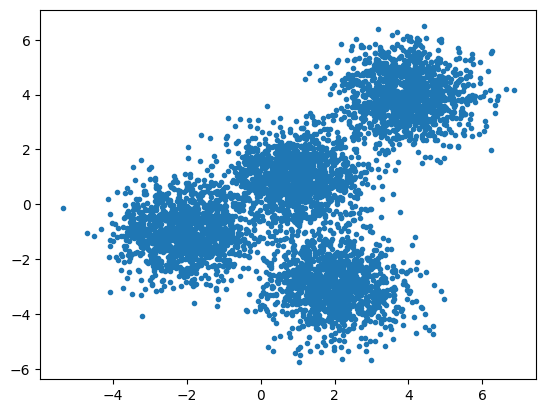

In [49]:
plt.scatter(X[:, 0], X[:, 1], marker='.')
## matplotlib scatter plot code:
#

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [50]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>.


In [51]:
k_means.fit(X)

print(" K-means model fitted successfully!")
print(f"Number of iterations: {k_means.n_iter_}")
print(f"Inertia: {k_means.inertia_:.2f}")
print(f" Model fitted: {k_means.fit}")

 K-means model fitted successfully!
Number of iterations: 4
Inertia: 7679.17
 Model fitted: <bound method KMeans.fit of KMeans(n_clusters=4, n_init=12)>


Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.


In [52]:
# Get the results
k_means_labels = k_means.labels_
print("Labels extracted successfully!")
print(f"k_means_labels shape: {k_means_labels.shape}")
print(f"Type: {type(k_means_labels)}")

Labels extracted successfully!
k_means_labels shape: (5000,)
Type: <class 'numpy.ndarray'>


We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>.


In [53]:
k_means_cluster_centers = k_means.cluster_centers_
# Display the cluster centers found by K-means
print(f"Cluster centers found by K-means:")
for i, center in enumerate(k_means_cluster_centers):
    print(f"  Cluster {i}: [{center[0]:.3f}, {center[1]:.3f}]")

Cluster centers found by K-means:
  Cluster 0: [1.997, -3.015]
  Cluster 1: [0.970, 0.987]
  Cluster 2: [3.973, 3.988]
  Cluster 3: [-2.036, -0.998]


<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


Please read through the code and comments to understand how to plot the model.


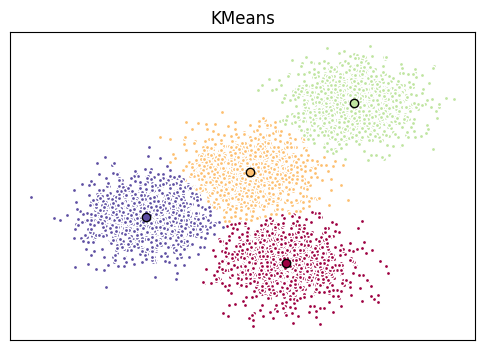

In [54]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Practice

Try to cluster the above dataset into 3 clusters.\
Notice: do not generate the data again, use the same dataset as above.


In [55]:
# Initialize KMeans for 3 clusters
k_means_3 = KMeans(init="k-means++", n_clusters=3, n_init=12, random_state=42)

# Fit the model with the same feature matrix X
k_means_3.fit(X)

print("K-means with 3 clusters fitted successfully!")
print(f"Number of iterations: {k_means_3.n_iter_}")
print(f"Inertia: {k_means_3.inertia_:.2f}")

# Get the labels and cluster centers
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centers = k_means_3.cluster_centers_

print(f"\n Results for 3 clusters:")
print(f"Cluster labels shape: {k_means_3_labels.shape}")
print(f"Unique labels: {np.unique(k_means_3_labels)}")
print(f"Cluster centers shape: {k_means_3_cluster_centers.shape}")


K-means with 3 clusters fitted successfully!
Number of iterations: 6
Inertia: 15004.48

 Results for 3 clusters:
Cluster labels shape: (5000,)
Unique labels: [0 1 2]
Cluster centers shape: (3, 2)


<details><summary>Click here for the solution</summary>

```python
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

```

</details>


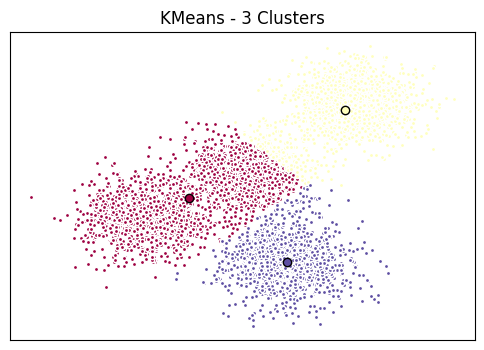

In [56]:
# Initialize the plot with the specified dimensions for 3 clusters
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_3_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_3_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-2, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_3_cluster_centers)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_3_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_3_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans - 3 Clusters')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

Let's download the datasetfrom IBM Object Storage.  **Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


In [57]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'

### Load Data From CSV File

Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.


In [58]:
import requests
import pandas as pd
import os

def download_file(url, filename):
    """Download a file from URL to local filename"""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        
        with open(filename, 'wb') as f:
            f.write(response.content)
        
        print(f"Downloaded {filename} successfully!")
        return True
    except Exception as e:
        print(f"Download failed: {e}")
        return False

# Replace with actual file URL
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv' # You need to provide the actual URL

# Download the file
filename = "Cust_Segmentation.csv"
if download_file(path, filename):
    # Check if file was downloaded
    if os.path.exists(filename):
        print(f"File '{filename}' exists! Size: {os.path.getsize(filename)} bytes")
        
        # Try to load with pandas
        try:
            df = pd.read_csv(filename)
            print(f"   Successfully loaded data:")
            print(f"   Shape: {df.shape}")
            print(f"   Columns: {list(df.columns)}")
            print("\nFirst 5 rows:")
            print(df.head())
        except Exception as e:
            print(f"Error reading CSV: {e}")
    else:
        print(f"File '{filename}' not found after download attempt")
else:
    print("Download failed")

Downloaded Cust_Segmentation.csv successfully!
File 'Cust_Segmentation.csv' exists! Size: 33426 bytes
   Successfully loaded data:
   Shape: (850, 10)
   Columns: ['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio']

First 5 rows:
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


we create a pandas dataframe


In [59]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


As you can see, **Address** in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.


In [60]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [61]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:] # .values converts it to a plain NumPyarray; [:,1:] slices all rows and columns from index 1 onward (drops first column ID/label)
# result is a 2D NumPy array x - just the feature columns
X = np.nan_to_num(X, nan=0.0, posinf=None, neginf=None) # replces non-finite values i X - prevents scaler errors caused by Nans/Infs
Clus_dataSet = StandardScaler().fit_transform(X)
# standardize each column-wise; subtracts the column mean; devides
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]], shape=(850, 8))

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [62]:
clusterNum = 3 # we want 3 clusters (k = 3)
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
# creates K-Means estimator from scikit-learn; init="k-means++": smart centroid seeding to speed convergence and improve quality vs random init
# n_init=12: run K-Means 12 times with different centroid seeds and keep the best (lowest inertia); reduces the chance of a bad local minimum
k_means.fit(X)
# runs the algorithm on the data matrix X (shape[n_samples, n_features]),
# iteratively assigning points to clusters and updating cetroids until convergence.
labels = k_means.labels_
# after fitting, this gives an array of cluster assignments for each sample in X
# values are integers 0,1,2 (for 3 clusters)
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

<h2 id="insights">Insights</h2>

We assign the labels to each row in the dataframe.


In [63]:
df["Clus_km"] = labels
# adds a new column named Clus_km to the pandas DataFrame df, filling it
# with the cluster IDs from labels(e.g.,0/1/2). Each row gets its assigned cluster.
# This requires len(labels) == len(df) so rows align by index.
df.head(5)
# Displays the first 5 rows of df, letting you quickly verify the new column was
# added and looks correct
# pd.crosstab(df.Clus_km, df.Age)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


We can easily check the centroid values by averaging the features in each cluster.


In [64]:
df.groupby('Clus_km').mean() # per-cluster numeric summary
# groupby('Clus_km'): splits the DataFrame into groups 
# based on the cluster labels 0,1,2,...
# .mean(): for each group, computes the mean of all numeric columns (non-numerics are ignored)
## result: a new DataFrame whose index is Clus_km and 
# the columns are numeric features, each value being the average within the cluster

## great for comparing cluster centroids in the original feature space


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Now, let's look at the distribution of customers based on their age and income:


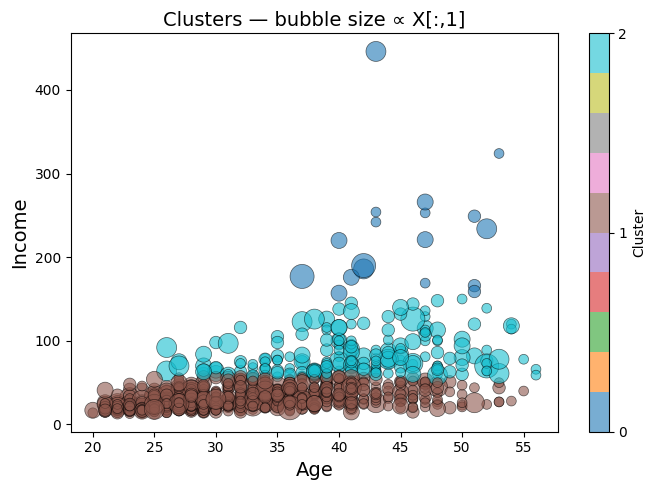

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Bubble sizes based on column 1
area_raw = np.pi * (X[:, 1] ** 2)

# Normalize safely (handle constant arrays to avoid divide-by-zero)
range_ = np.ptp(area_raw)  # NumPy 2.0+: use function, not method
if range_ == 0:
    area_norm = np.zeros_like(area_raw, dtype=float)
else:
    area_norm = (area_raw - area_raw.min()) / range_

sizes = 50 + 250 * area_norm  # sizes in points^2

plt.figure(figsize=(7, 5))
sc = plt.scatter(
    X[:, 0],            # x-axis (e.g., Age)
    X[:, 3],            # y-axis (e.g., Income)
    s=sizes,
    c=labels,           # cluster colors
    cmap="tab10",
    alpha=0.6,
    edgecolor="k",
    linewidth=0.5,
)

plt.xlabel("Age", fontsize=14)
plt.ylabel("Income", fontsize=14)
plt.title("Clusters — bubble size ∝ X[:,1]", fontsize=14)

cbar = plt.colorbar(sc, ticks=np.unique(labels))
cbar.set_label("Cluster")

plt.tight_layout()
plt.show()

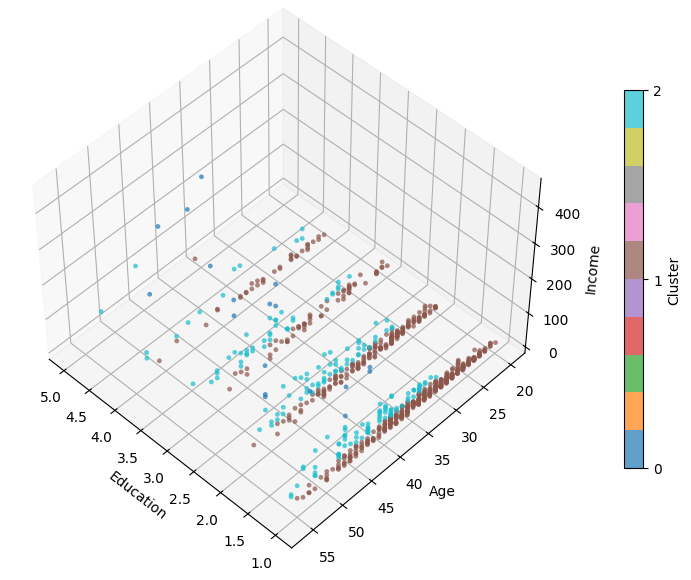

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure labels are integers (0..k-1)
labels_int = np.asarray(labels, dtype=int)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Camera/view
ax.view_init(elev=48, azim=134)

# Axes labels (match your feature order)
ax.set_xlabel('Education')   # X axis uses X[:, 1]
ax.set_ylabel('Age')         # Y axis uses X[:, 0]
ax.set_zlabel('Income')      # Z axis uses X[:, 3]

sc = ax.scatter(
    X[:, 1], X[:, 0], X[:, 3],
    c=labels,
    cmap='tab10',
    s=12,
    alpha=0.7,
    edgecolors='none',     # faster than outlining every point
    depthshade=False,      # cheaper for 3D
    rasterized=True,       # render points as a bitmap for speed
)
# You can also skip the colorbar if still slow:
# plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.7)

# Optional legend via colorbar with tick labels = cluster IDs
cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.7, ticks=np.unique(labels_int))
cbar.set_label('Cluster')

# plt.tight_layout()
# Avoid tight_layout (slow); use a small padding instead
plt.subplots_adjust(left=0.05, right=0.98, bottom=0.05, top=0.95)
plt.show()



k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster.
For example, the 3 clusters can be:

*   AFFLUENT, EDUCATED AND OLD AGED
*   MIDDLE AGED AND MIDDLE INCOME
*   YOUNG AND LOW INCOME


# How to build profiles (quick plan)

Compute per-cluster summary stats (mean/median, counts).

Standardize features (z-scores) to compare scales.

For each cluster, find which features are high / medium / low vs the overall population.

Turn those into short, human-readable labels (e.g., “Affluent, Educated, Older”).

Sanity-check with plots.

In [68]:
import numpy as np
import pandas as pd

# 1) Per-cluster summaries
summary = df.groupby("Clus_km").agg({
    "Age": ["mean", "median"],
    "Income": ["mean", "median"],
    "Edu": ["mean", "median"],
    # add more features if you have them
})
counts = df["Clus_km"].value_counts().sort_index()
summary[("n", "count")] = counts.values
print(summary)

# 2) Z-scores vs overall (so features are comparable)
features = ["Age", "Income", "Edu"]
mu = df[features].mean()
sigma = df[features].std(ddof=0).replace(0, np.nan)  # avoid div-by-zero

cluster_means = df.groupby("Clus_km")[features].mean()
z = (cluster_means - mu) / sigma
print("\nZ-scores by cluster (positive = above overall mean):\n", z.round(2))

# 3) Map z-scores to qualitative buckets
def bucketize(val, hi=0.6, lo=-0.6):
    if np.isnan(val): return "—"
    if val >= hi:     return "high"
    if val <= lo:     return "low"
    return "mid"

buckets = z.applymap(bucketize)
print("\nQualitative levels:\n", buckets)

# 4) Build short profile names
def make_label(row):
    parts = []
    if row["Income"] == "high": parts.append("Affluent")
    if row["Income"] == "low":  parts.append("Low income")

    if row["Edu"] == "high": parts.append("Educated")
    if row["Edu"] == "low":  parts.append("Less educated")

    if row["Age"] == "high": parts.append("Older")
    if row["Age"] == "mid":  parts.append("Middle-aged")
    if row["Age"] == "low":  parts.append("Younger")

    return ", ".join(parts) if parts else "Mixed profile"

labels_by_cluster = buckets.apply(make_label, axis=1)
print("\nCluster profiles:")
for k, label in labels_by_cluster.items():
    print(f"Cluster {k}: {label}")

# (Optional) attach profile name back to df
df["ClusterProfile"] = df["Clus_km"].map(labels_by_cluster)


               Age             Income              Edu            n
              mean median        mean median      mean median count
Clus_km                                                            
0        45.388889   45.0  227.166667  220.5  2.666667    3.0    18
1        32.964561   32.0   31.164869   29.0  1.614792    1.0   649
2        41.333333   41.0   83.928962   76.0  1.956284    2.0   183

Z-scores by cluster (positive = above overall mean):
           Age  Income   Edu
Clus_km                    
0        1.29    4.69  1.03
1       -0.26   -0.40 -0.10
2        0.78    0.97  0.26

Qualitative levels:
           Age Income   Edu
Clus_km                   
0        high   high  high
1         mid    mid   mid
2        high   high   mid

Cluster profiles:
Cluster 0: Affluent, Educated, Older
Cluster 1: Middle-aged
Cluster 2: Affluent, Older


C:\Users\User\AppData\Local\Temp\ipykernel_19300\3247357090.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  buckets = z.applymap(bucketize)


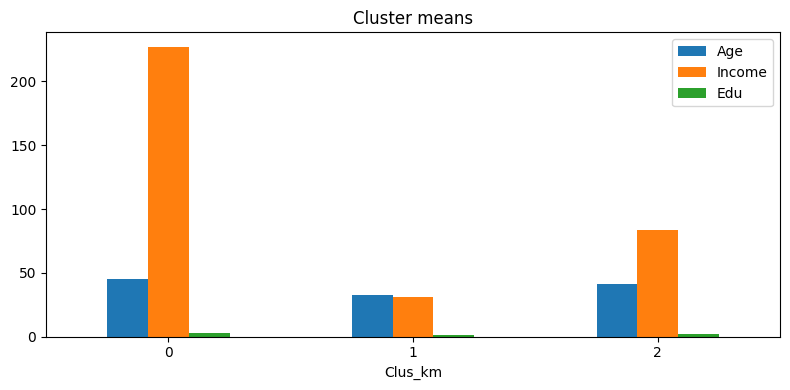

In [69]:
import matplotlib.pyplot as plt

cluster_means.plot(kind="bar", figsize=(8,4), rot=0)
plt.title("Cluster means")
plt.tight_layout(); plt.show()